In [24]:
# load the below packages
import pandas as pd
import numpy as np
import datetime
from suntime import Sun, SunTimeException
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the CSV
df = pd.read_csv('indian_cities_lat_long.csv')

# create a start and end date object
start = datetime.datetime(2022, 1, 1, 0, 0, 0)
end = datetime.datetime(2022, 12, 31, 0, 0, 0)
delta = end - start
# (later) KNOW MORE: https://docs.python.org/3/library/datetime.html

In [14]:
#Daylight Duration
guw_lat = float(df.lat[df.city=="Guwahati"])
guw_lon = float(df.lng[df.city=="Guwahati"])

sun = Sun(guw_lat, guw_lon)
this_date = datetime.datetime(2022, 1, 1, 0, 0, 0)

sunrise = sun.get_local_sunrise_time(this_date)
sunset = sun.get_local_sunset_time(this_date)

duration = sunset-sunrise
print("Daylight Duration: ", duration)

Daylight Duration:  10:31:00


In [30]:
start_date = date(2022, 1, 1)
end_date = date(2022, 12, 31)
one_day = datetime.timedelta(days = 1)

dates = []
day_duration = []

while(start_date <= end_date):
    
    sunrise = sun.get_local_sunrise_time(start_date)
    sunset = sun.get_local_sunset_time(start_date)
    
    duration = sunset-sunrise
    
    if duration < datetime.timedelta(0, 0, 0, 0):
        duration+= one_day
        
    dates.append(start_date)
    day_duration.append(duration.total_seconds()/3600.0)
    
    start_date += one_day
    
dur_df = pd.DataFrame({"date":dates, "duration":day_duration})
dur_df.head(5)

,date,duration
0,2022-01-01,10.516667
1,2022-01-02,10.533333
2,2022-01-03,10.550000
3,2022-01-04,10.550000
4,2022-01-05,10.550000


Text(0.5, 1.0, 'Daylight Duration vs Date')

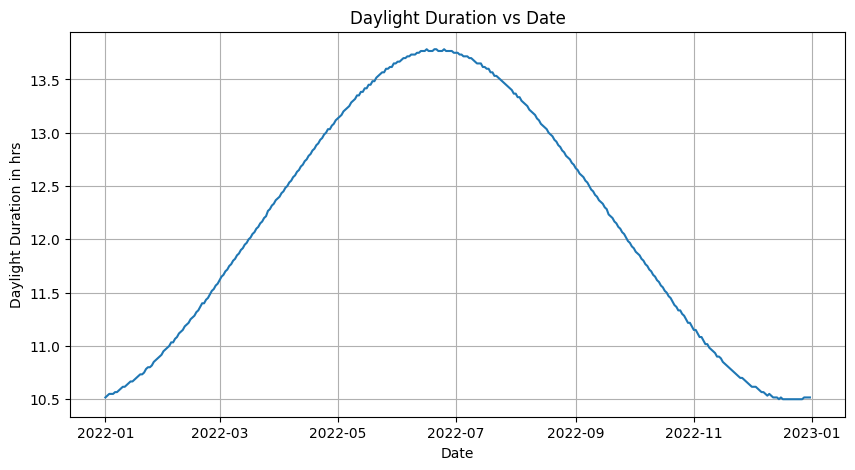

In [33]:
plt.figure(figsize = (10, 5))
plt.ylabel('Daylight Duration in hrs')
plt.xlabel('Date')
plt.grid()
plt.plot(dur_df.date, dur_df.duration)
plt.title("Daylight Duration vs Date")

In [36]:
print("Days with maximum daylight duration:\n")
print(dur_df[dur_df.duration == dur_df.duration.max()])
print("\nDays with minimum daylight duration:\n")
print(dur_df[dur_df.duration == dur_df.duration.min()])

Days with maximum daylight duration:

           date   duration
166  2022-06-16  13.783333
170  2022-06-20  13.783333
171  2022-06-21  13.783333
175  2022-06-25  13.783333

Days with minimum daylight duration:

           date  duration
348  2022-12-15      10.5
350  2022-12-17      10.5
351  2022-12-18      10.5
352  2022-12-19      10.5
353  2022-12-20      10.5
354  2022-12-21      10.5
355  2022-12-22      10.5
356  2022-12-23      10.5
357  2022-12-24      10.5
358  2022-12-25      10.5
359  2022-12-26      10.5
360  2022-12-27      10.5


In [50]:
print(dur_df.date[10], " : ", dur_df.duration[10])
print(dur_df.date[11], " : ", dur_df.duration[11])
print(dur_df.date[12], " : ", dur_df.duration[12])
print(dur_df.date[13], " : ", dur_df.duration[13])
print(dur_df.date[14], " : ", dur_df.duration[14])
print(dur_df.date[15], " : ", dur_df.duration[15])

2022-01-11  :  10.616666666666667
2022-01-12  :  10.633333333333333
2022-01-13  :  10.65
2022-01-14  :  10.666666666666666
2022-01-15  :  10.666666666666666
2022-01-16  :  10.683333333333334


We can see that the daylight duration is beginning to increase around 14-15 january. This can also be seen from the given graph.

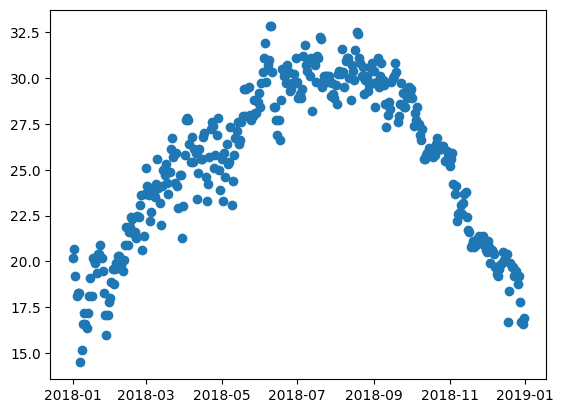

In [56]:
from meteostat import Point, Daily

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 12, 31)

location = Point(guw_lat, guw_lon)

data = Daily(location, start, end)
data = data.fetch()

plt.scatter(x = data.index, y = data.tavg)

In [60]:
print("Correlation Matrix between Avg Temp and Daylight Duration is: \n", np.corrcoef(dur_df.duration, data.tavg))

Correlation Matrix between Avg Temp and Daylight Duration is: 
 [[1.         0.84744285]
 [0.84744285 1.        ]]


Thus, the cross correlation coefficien is 0.84744285. Which means that they are highly correlated

In [66]:
#Fitting polynomial and getting coefficients
coeff = np.polyfit(dur_df.duration, data.tavg, 2)

modelPredictions = np.polyval(coeff, dur_df.duration)
absError = modelPredictions - data.tavg

SE = np.square(absError)
MSE = np.mean(SE)

print(MSE)

4.432594463848113


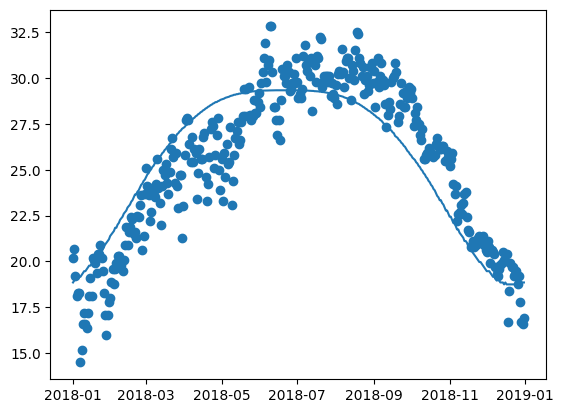

In [72]:
plt.plot(data.index, modelPredictions)
plt.scatter(x = data.index, y = data.tavg)

We can see that the predicted distribution resembles the actual distribution in shape. We can say that the prediction was fairly accurate. Error can be reduced by fitting a higher order polynomial. We can also consider other variables such as humidity, windspeed, etc that give us a better idea of the temperature.